In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
mouse_drug_file_path = os.path.join("Data","mouse_drug_data.csv")
clinical_trial_file_path = os.path.join("Data","clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv(mouse_drug_file_path)
clinical_trial_data = pd.read_csv(clinical_trial_file_path)

In [26]:
main_df = clinical_trial_data.join(mouse_drug_data.set_index("Mouse ID"), on = "Mouse ID")
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [34]:
drug_tumor = pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
drug_tumor

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [39]:
pd.DataFrame(main_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem())

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [63]:
pivottbl = pd.DataFrame(pd.pivot_table(drug_tumor, values = "Tumor Volume (mm3)" , index = ["Timepoint"], columns = ["Drug"]))
pivottbl

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


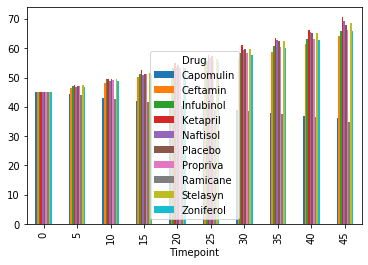

In [67]:
pivottbl.plot(kind = "bar")
plt.show()

NameError: name 'state_and_inches' is not defined